
<h2 align="left"><font size="5">Final Project: House Sales in King County, USA </font></h2>


<h3>Table of Contents</h3>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
    <li><a href="#Scenario">Scenario</a></li>
    <li><a href="#About-the-Dataset">About the Dataset</a></li>
    <li><a href="#1:-Importing-Data-Sets">1: Importing Data </a></li>
    <li><a href="#2:-Data-Wrangling">2: Data Wrangling</a> </li>
    <li><a href="#3:-Exploratory-Data-Analysis">3: Exploratory Data Analysis</a></li>
    <li><a href="#4:-Model-Development">4: Model Development</a></li>
    <li><a href="#5:-Model-Evaluation-and-Refinement">5: Model Evaluation and Refinement</a></li>
</a></li>
</div>
<p></p>
</div>

<hr>


### Scenario


A Real Estate Investment Trust (REIT) has tasked a Data Analyst with determining the market price of houses with a given set of features. Tasks include pre-processing, data transformation, and creating regression models to predict housing prices using attributes such as square footage, number of bedrooms, number of floors, etc.



### About the Dataset

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015. It was taken from [here](https://www.kaggle.com/harlfoxem/housesalesprediction?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-wwwcourseraorg-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2022-01-01). It was also slightly modified for the purposes of the IBM project. 


| Variable      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| id            | A notation for a house                                                                                      |
| date          | Date house was sold                                                                                         |
| price         | Price is prediction target                                                                                  |
| bedrooms      | Number of bedrooms                                                                                          |
| bathrooms     | Number of bathrooms                                                                                         |
| sqft_living   | Square footage of the home                                                                                  |
| sqft_lot      | Square footage of the lot                                                                                   |
| floors        | Total floors (levels) in house                                                                              |
| waterfront    | House which has a view to a waterfront                                                                      |
| view          | Has been viewed                                                                                             |
| condition     | How good the condition is overall                                                                           |
| grade         | overall grade given to the housing unit, based on King County grading system                                |
| sqft_above    | Square footage of house apart from basement                                                                 |
| sqft_basement | Square footage of the basement                                                                              |
| yr_built      | Built Year                                                                                                  |
| yr_renovated  | Year when house was renovated                                                                               |
| zipcode       | Zip code                                                                                                    |
| lat           | Latitude coordinate                                                                                         |
| long          | Longitude coordinate                                                                                        |
| sqft_living15 | Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area |
| sqft_lot15    | LotSize area in 2015(implies-- some renovations)                                                            |


### Import the required libraries 


In [10]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"

In [11]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [12]:
#!pip install -U scikit-learn

In [13]:
#import piplite
#await piplite.install('seaborn')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

### 1: Importing Dataset


In [14]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

ModuleNotFoundError: No module named 'pyodide'

In [ ]:
filepath='https://www.kaggle.com/datasets/harlfoxem/housesalesprediction?select=kc_house_data.csv'

In [ ]:
await download(filepath, "housing.csv")
file_name="housing.csv"

Load the csv:


In [ ]:
df = pd.read_csv(file_name)

> Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface.


In [ ]:
#filepath='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
#df = pd.read_csv(filepath, header=None)

Displaying first 5 columns of the dataframe.


In [ ]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Data Types

Displaying data types of each column. 


In [ ]:
# Dtypes 
df.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

Statistical summary


In [ ]:
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Data Wrangling



Dropping columns <code>"id"</code>  and <code>"Unnamed: 0"</code> from axis 1. Obtaining statistical summary of data.


In [ ]:
# Cleaning and summarizing
df.drop(['id', 'Unnamed: 0'], axis=1, inplace=True)
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


We can see we have missing values for the columns <code> bedrooms</code>  and <code> bathrooms </code>


In [ ]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 13
number of NaN values for the column bathrooms : 10


Replacing missing values of column <code>'bedrooms'</code> with mean of column <code>'bedrooms' </code>.


In [ ]:
mean=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace=True)

Replacing missing values of column <code>'bathrooms'</code> with mean of column <code>'bathrooms' </code>.


In [ ]:
mean=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean, inplace=True)

In [ ]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


### Exploratory Data Analysis


### Houses with unique features

Counting number of houses with unique floor values and converting to data frame. 


In [ ]:
# No. of Houses 
num_of_houses= df['floors'].value_counts()
num_of_houses.to_frame()

,count
floors,
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


### Waterfront Views and Price Outliers

Plotting <code>boxplot</code> in the seaborn library to determine whether houses with a waterfront view or without a waterfront view have more price outliers. 


<AxesSubplot:xlabel='waterfront', ylabel='price'>

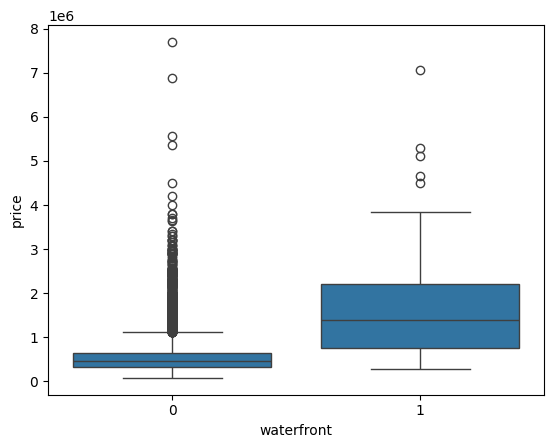

In [ ]:
# Boxplot Comparing Waterfront and Non-Waterfront Views Against Price
sns.boxplot(x='waterfront', y='price', data=df)

### Housing Features as Determinants of Price

Plotting <code>regplot</code> in the seaborn library to determine if feature <code>sqft_above</code> is negatively or positively correlated with price. 


(0.0, 8081250.0)

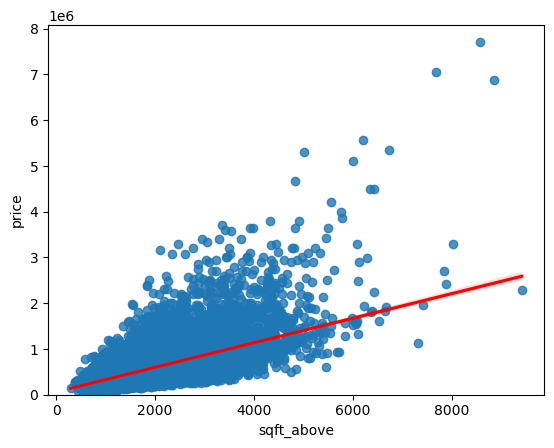

In [ ]:
## Regression Model Using House SqFt as Predictor of Price
sns.regplot(x='sqft_above', y='price', line_kws={"color":"red"}, data=df)
plt.ylim(0,)

Finding the feature that is most correlated with price.


In [ ]:
df_numeric = df.select_dtypes(include=[np.number])
df_numeric.corr()['price'].sort_values()

zipcode         -0.053203
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308797
sqft_basement    0.323816
view             0.397293
bathrooms        0.525738
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

### Model Development


Fitting a linear regression model using the longitude feature <code>'long'</code>. Calculated R^2.


In [ ]:
X = df[['long']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.00046769430149007363

### Linear Regression Model

Fitting a linear regression model to predict the <code>'price'</code> using the feature <code>'sqft_living'</code> then calculated R^2.


In [ ]:
# Linear Regression Model

X1= df[['sqft_living']]
Y1= df['price']

lm1 = LinearRegression()
lm1.fit(X1,Y1)
r_squared = lm1.score(X1, Y1)

print("R Squared is:", r_squared)

R Squared is: 0.4928532179037931


### Linear Regression Model Using All Features

Fitting a linear regression model to predict the <code>'price'</code> using all features.


In [ ]:
# Linear Regression Model

features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]

Z = df[["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]]
Y2= df['price']

lm2 = LinearRegression()
lm2.fit(Z, Y2)

LinearRegression()

Calculated R^2 for linear regression model.


In [ ]:
## R^2 Value for Linear Regression Model
r2_lm2 = lm2.score(Z, Y2)

print("R Squared value is:", r2_lm2)

R Squared value is: 0.6576890354915759


### Estimator and Model Constructors

Estimator names:

<code>'scale'</code>

<code>'polynomial'</code>

<code>'model'</code>

Model constructors

<code>StandardScaler()</code>

<code>PolynomialFeatures(include_bias=False)</code>

<code>LinearRegression()</code>


In [ ]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

### Pipeline Object

Creating pipeline object to predict the 'price', and fitting the object using all <code>features</code>, then calculated R^2.


In [ ]:
# Pipeline Object Using All Features

pipe=Pipeline(Input)
Z=Z.astype(float)
pipe.fit(Z,Y2)
ypipe=pipe.predict(Z)

print(ypipe[0:4])

print("R Squared is:", pipe.score(Z, Y2))

[350520.125 559160.125 456600.125 396998.125]
R Squared is: 0.7512051345272872


### Model Evaluation and Refinement


Importing necessary modules:


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
print("done")

done


Splitting data into training and testing sets:


In [ ]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)

print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3242
number of training samples: 18371


### Ridge Object

Creating and fitting a Ridge regression object using training data. Regularization parameter set to 0.1. Calculated R^2 using test data.


In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
# Ridge Object with Parameter Set to 0.1
rr_martin = Ridge(alpha=0.1)

rr_martin.fit(x_train, y_train)
r2test = rr_martin.score(x_test,y_test)

print("R^2:", r2test)

R^2: 0.647875916393907


### Polynomial Transform on Ridge Object

Performing a second order polynomial transform on both training data and testing data. Creating and fitting a Ridge regression object using training data. Regularization parameter set to 0.1. Calculated R^2 utilizing the test data.


In [ ]:
# Polynomial Transform

pr= PolynomialFeatures(degree=2, include_bias=False)

x_train_pr= pr.fit_transform(x_train, y_train) # oops. I only needed to transform the x_train 
x_test_pr = pr.fit_transform(x_test, y_test) # oops same here. I only needed to transform the x_test

rmodel=Ridge(alpha=0.1)
rmodel.fit(x_train_pr, y_train)

test_score = rmodel.score(x_test_pr, y_test)

print("R^2 Test Model:", test_score)

R^2 Test Model: 0.700274425803224


<h4>(I did some edits to the project writing - Christine Gonzalez :):</h4> 




## <h4 align="center"> © IBM Corporation 2020. All rights reserved. <h4/>
<!--## Change Log

| Date (YYYY-MM-DD) | Version | Changed By      | Change Description                           |
| ----------------- | ------- | --------------- | -------------------------------------------- |
| 2020-12-01        | 2.2     | Aije Egwaikhide | Coverted Data describtion from text to table |
| 2020-10-06        | 2.1     | Lakshmi Holla   | Changed markdown instruction of Question1    |
| 2020-08-27        | 2.0     | Malika Singla   | Added lab to GitLab                          |
| 2022-06-13        | 2.3     | Svitlana Kramar | Updated Notebook sharing instructions        |
| <hr>              |         |                 |                                              |


--!>
<p>
